Problem statement: Is Medi-Cal serving the population in an effective means? We will be analising the population of California that is enrolled in their Medicaid state plan. What part of the population by county is enrolled, underserved and the demographics of those people.

In [2]:
import pandas as pd
import numpy as np

First, we will be looking at the Medi-Cal Data of enrollments by county and the percentage of the enrollees per county. As well as what plans the majority of enrollees are under.

In [3]:
CAManagedCareEnrollment2007to2022=pd.read_csv('/Users/travis/Desktop/projects/open-data-portal-managed-care-enrollment-count-july-2022.csv')

In [4]:
CAManagedCareEnrollment2007to2022.info()
CAManagedCareEnrollment2007to2022.head()
CAManagedCareEnrollment2007to2022.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22679 entries, 0 to 22678
Data columns (total 7 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Enrollment Month                           22679 non-null  object 
 1   Plan Type                                  22679 non-null  object 
 2   County                                     22679 non-null  object 
 3   Plan Name                                  22679 non-null  object 
 4   Count of Enrollees                         22399 non-null  float64
 5   Count of Enrollees Annotation Code         22679 non-null  object 
 6   Count of Enrollees Annotation Description  22679 non-null  object 
dtypes: float64(1), object(6)
memory usage: 1.2+ MB


,Enrollment Month,Plan Type,County,Plan Name,Count of Enrollees,Count of Enrollees Annotation Code,Count of Enrollees Annotation Description
22674,2022-07,Special Project,San Joaquin,InnovAge PACE/San Joaquin,NaN,1,Cell suppressed for small numbers
22675,2022-07,Special Project,Stanislaus,Central PACE Stanislaus,167.0,None,None
22676,2022-07,Special Project,Sutter,InnovAge PACE/Sutter,NaN,1,Cell suppressed for small numbers
22677,2022-07,Special Project,Tulare,Sequioa PACE Tulare,11.0,None,None
22678,2022-07,Special Project,Yuba,InnovAge PACE/Yuba,NaN,1,Cell suppressed for small numbers


Lets only use the decade from 2010 to 2020 and we'll call the dataset we'll be working with CAenrollment_decade10

In [5]:
discard=['2007', '2008', '2009', '2021', '2022']
CAenrollment_decade10=CAManagedCareEnrollment2007to2022[~CAManagedCareEnrollment2007to2022['Enrollment Month'].str.contains('|'.join(discard))]
print(CAenrollment_decade10)

      Enrollment Month        Plan Type           County  \
2834           2010-01             COHS           Merced   
2835           2010-01             COHS         Monterey   
2836           2010-01             COHS             Napa   
2837           2010-01             COHS           Orange   
2838           2010-01             COHS  San Luis Obispo   
...                ...              ...              ...   
19424          2020-12  Special Project       Sacramento   
19425          2020-12  Special Project       San Diego    
19426          2020-12  Special Project    San Francisco   
19427          2020-12  Special Project       Stanislaus   
19428          2020-12  Special Project           Tulare   

                                             Plan Name  Count of Enrollees  \
2834     Central California Alliance for Health Merced             69980.0   
2835   Central California Alliance for Health/Monterey             68498.0   
2836                         Partnership HP o

In [6]:
CAenrollment_decade10.info()
CAenrollment_decade10.head()
CAenrollment_decade10.tail()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16595 entries, 2834 to 19428
Data columns (total 7 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Enrollment Month                           16595 non-null  object 
 1   Plan Type                                  16595 non-null  object 
 2   County                                     16595 non-null  object 
 3   Plan Name                                  16595 non-null  object 
 4   Count of Enrollees                         16503 non-null  float64
 5   Count of Enrollees Annotation Code         16595 non-null  object 
 6   Count of Enrollees Annotation Description  16595 non-null  object 
dtypes: float64(1), object(6)
memory usage: 1.0+ MB


,Enrollment Month,Plan Type,County,Plan Name,Count of Enrollees,Count of Enrollees Annotation Code,Count of Enrollees Annotation Description
19424,2020-12,Special Project,Sacramento,InnovAge/Sacramento,90.0,None,None
19425,2020-12,Special Project,San Diego,Rady Childrens Hosp/San Diego,372.0,None,None
19426,2020-12,Special Project,San Francisco,Family Mosaic Prj / SF,NaN,1,Cell suppressed for small numbers
19427,2020-12,Special Project,Stanislaus,Central PACE Stanislaus,40.0,None,None
19428,2020-12,Special Project,Tulare,Sequioa PACE Tulare,NaN,1,Cell suppressed for small numbers


In [7]:
print(CAenrollment_decade10['Plan Type'].nunique())

16


In [8]:
CAenrollment_decade10.isnull()

,Enrollment Month,Plan Type,County,Plan Name,Count of Enrollees,Count of Enrollees Annotation Code,Count of Enrollees Annotation Description
2834,False,False,False,False,False,False,False
2835,False,False,False,False,False,False,False
2836,False,False,False,False,False,False,False
2837,False,False,False,False,False,False,False
2838,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
19424,False,False,False,False,False,False,False
19425,False,False,False,False,False,False,False
19426,False,False,False,False,True,False,False
19427,False,False,False,False,False,False,False


In [9]:
CAenrollment_decade10.isnull().sum()

Enrollment Month                              0
Plan Type                                     0
County                                        0
Plan Name                                     0
Count of Enrollees                           92
Count of Enrollees Annotation Code            0
Count of Enrollees Annotation Description     0
dtype: int64

It seems the only column with Null data is Count of Enrollees. Lets deterrmine how much of the Count of Enrollees is Null.

In [10]:
count_of_enrollees=CAenrollment_decade10['Count of Enrollees'].sum()
print(count_of_enrollees)

1178790135.0


In [11]:
null_count_of_enrollees=CAenrollment_decade10['Count of Enrollees'].isnull().sum()
print(null_count_of_enrollees)

92


In [12]:
null_percentage=null_count_of_enrollees/count_of_enrollees
print('{:.01%}'.format(null_percentage))

0.0%


Since the percentage of null values in the Count of Enrolless is less than 0.0%, we wont drop the column from the dataset. Instead we'll go ahead and input the missing data as 'No Enrollees'.

In [13]:
CAenrollment_decade10['Count of Enrollees']=CAenrollment_decade10['Count of Enrollees'].fillna(0)

/var/folders/3k/3l_lpzgd5n1gwqlldpy8srg00000gp/T/ipykernel_75861/1078885126.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CAenrollment_decade10['Count of Enrollees']=CAenrollment_decade10['Count of Enrollees'].fillna(0)


In [14]:
CAenrollment_decade10.isnull().sum()

Enrollment Month                             0
Plan Type                                    0
County                                       0
Plan Name                                    0
Count of Enrollees                           0
Count of Enrollees Annotation Code           0
Count of Enrollees Annotation Description    0
dtype: int64

As you can see we no longer have any null vallues.
The next step in our data cleaning process is to check for Duplicate data. Missing data can cause issues just like Null values can.

In [15]:
CAenrollment_decade10.duplicated()

2834     False
2835     False
2836     False
2837     False
2838     False
         ...  
19424    False
19425    False
19426    False
19427    False
19428    False
Length: 16595, dtype: bool

Upon inpection we have no duplicate data. 

Lets go ahead and analyze our data to see what counties had the most enrollments and which counties had the least amount of enrollment.
We'll use unique_county as the name for the amount of the counties in California 

In [16]:
unique_county=CAenrollment_decade10['County'].nunique()
print(unique_county)

59


We're going to use county_count as the name for the counties and their total amount of individuals that have enrolled into Medicaid California through the county the live in. 

In [17]:
county_count=CAenrollment_decade10.groupby(by=['County'])['Count of Enrollees'].sum()
print(county_count)

County
Alameda             33332170.0
Alpine                 19885.0
Amador                513475.0
Butte                5213590.0
Calaveras             768490.0
Colusa                595340.0
Contra Costa        20711618.0
Del Norte             956913.0
El Dorado            2363769.0
Fresno              43195670.0
Glenn                 797263.0
Humboldt             4273393.0
Imperial             6104595.0
Inyo                  322761.0
Kern                33096728.0
Kings                4681863.0
Lake                 2487407.0
Lassen                610347.0
Los Angeles        365255701.0
Madera               5573837.0
Marin                3611613.0
Mariposa              315444.0
Mendocino            3639187.0
Merced              13720164.0
Modoc                 263161.0
Mono                  208701.0
Monterey            16122993.0
Napa                 3005314.0
Nevada               1611677.0
Orange              81566635.0
Placer               3740244.0
Plumas                386074.0
R

In [18]:
print(county_count.idxmax())
print(county_count.max())
print(county_count.median())

Los Angeles
365255701.0
4681863.0


In [19]:
print(county_count.idxmin())
print(county_count.min())
print(county_count.median())

Alpine
19885.0
4681863.0


So we have learned that the county with the most enrollees from 2010 to 2020 is Los Angeles with      365,255,701

The county with the least amount of enrollees from 2010 to 2020 is Alpine with 19,885

Let's go ahead and determine the percentage of that makes up the Los Angeles enrollees and the Alpine enrollees from the all of the enrollees in California.

In [20]:
print(CAenrollment_decade10['Count of Enrollees'].sum())

1178790135.0


We're going to be using LA as the abrevation for the Los Angeles 

In [21]:
LA=(365255701/CAenrollment_decade10['Count of Enrollees'].sum())*100
print(LA)

30.98564283454917


From the calculations we see that Los Angeles, the county with the most enrollees from 2010 to 2020, makes up 31% of the amount of enrollees in california's 59 counties. 
Now, lets the percent of enrollees in Alpine, the least amount of enrollees from 2010 to 2020.
We'll be setting the amount of enrollees in Alpine as AP.

In [22]:
AP=(19885/CAenrollment_decade10['Count of Enrollees'].sum())
print(AP)

1.6868990848824842e-05


From the calculations we see that Alpine, the county with the least amount of enrollees from 2010 to 2020, makes up 1.7% of the amount of enrollees in Caliornia's 59 counties.

Now since we have decided the percentage of the county with the most enrollees and the county with the least amount of enrollees, lets dig deeper and see how how the two counties differ in the plan types that they both individually enroll in.

In [23]:
county_plans=CAenrollment_decade10.groupby(by=['County'])['Plan Type'].max()
print(county_plans)

County
Alameda                           Two-Plan
Alpine                            Regional
Amador                            Regional
Butte                             Regional
Calaveras                         Regional
Colusa                            Regional
Contra Costa                      Two-Plan
Del Norte                             COHS
El Dorado                  Special Project
Fresno                            Two-Plan
Glenn                             Regional
Humboldt                              PACE
Imperial                    Imperial Model
Inyo                              Regional
Kern                              Two-Plan
Kings                             Two-Plan
Lake                                  COHS
Lassen                                COHS
Los Angeles                       Two-Plan
Madera                            Two-Plan
Marin                  Prepaid Health Plan
Mariposa                          Regional
Mendocino                             COHS
Merc

What we find here is that the majority of people who enrollee in Los Angeles, choose Two-Plan and the majority of people in Alpine, choose Regional.

Now, we can see the county(Los Angeles) with the most enrollees and the county(Alpine) with the least enollees cooraliate to being underrserved and how California as a whole is underserved.

We'll be looking at the dataset "Health Professional Shortage Areas in Califonia" Primary care dataset from the California Health and Human Services Open Data Portal

In [24]:
hpsa_primarycare=pd.read_csv('hpsa_primarycare.csv')
hpsa_primarycare.info()
hpsa_primarycare.head()
hpsa_primarycare.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2329 entries, 0 to 2328
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   HPSA Discipline Class                 2329 non-null   object
 1   HPSA Geography Identification Number  2329 non-null   int64 
 2   HPSA Component Type Description       2329 non-null   object
 3   HPSA Name                             2329 non-null   object
 4   HPSA ID                               2329 non-null   object
 5   County Equivalent Name                2329 non-null   object
 6   Designation Type                      2329 non-null   object
 7   HPSA Population Type                  2329 non-null   object
 8   HPSA Status                           2329 non-null   object
 9   HPSA Score                            2329 non-null   int64 
 10  HPSA Designation Date                 2329 non-null   object
 11  HPSA Designation Last Update D

,HPSA Discipline Class,HPSA Geography Identification Number,HPSA Component Type Description,HPSA Name,HPSA ID,County Equivalent Name,Designation Type,HPSA Population Type,HPSA Status,HPSA Score,HPSA Designation Date,HPSA Designation Last Update Date,Data Warehouse Record Create Date
2324,Primary Care,6115040700,Census Tract,LI/MFW-MSSA 249/Marysville,1062092319,Yuba,HPSA Population,Low Income Migrant Farmworker Population HPSA,Designated,15,11/30/1993,6/30/2017,1/8/2021
2325,Primary Care,6115040901,Census Tract,LI/MFW-MSSA 249/Marysville,1062092319,Yuba,HPSA Population,Low Income Migrant Farmworker Population HPSA,Designated,15,11/30/1993,6/30/2017,1/8/2021
2326,Primary Care,6115040902,Census Tract,LI/MFW-MSSA 249/Marysville,1062092319,Yuba,HPSA Population,Low Income Migrant Farmworker Population HPSA,Designated,15,11/30/1993,6/30/2017,1/8/2021
2327,Primary Care,6115041000,Census Tract,LI/MFW-MSSA 249/Marysville,1062092319,Yuba,HPSA Population,Low Income Migrant Farmworker Population HPSA,Designated,15,11/30/1993,6/30/2017,1/8/2021
2328,Primary Care,6115041100,Census Tract,MSSA 247/Browns Valley,1066503651,Yuba,Geographic HPSA,Geographic Population,Designated,17,9/30/1998,10/28/2017,1/8/2021


In [25]:
hpsa_primarycare['HPSA Designation Last Update Date'].sort_values()

29      1/19/2017
27      1/19/2017
30      1/19/2017
31      1/19/2017
32      1/19/2017
          ...    
1406    9/20/2018
1407    9/20/2018
1402    9/20/2018
1408    9/21/2020
1409    9/21/2020
Name: HPSA Designation Last Update Date, Length: 2329, dtype: object

In [26]:
countyscore=hpsa_primarycare.groupby(by=['County Equivalent Name'])['HPSA Score'].mean().sort_values()
print(countyscore)

County Equivalent Name
Sonoma             7.000000
Nevada             7.000000
Alameda            8.000000
San Benito         8.000000
Napa               8.000000
Calaveras          8.000000
Del Norte          9.000000
Amador             9.250000
San Diego          9.572816
Placer            10.000000
Alpine            10.000000
Mariposa          10.000000
Humboldt          10.333333
Butte             10.821429
Riverside         10.837209
Mendocino         10.941176
Colusa            11.000000
Merced            11.285714
Orange            11.682540
Stanislaus        11.806452
Siskiyou          12.000000
Solano            12.000000
Santa Barbara     12.000000
Tuolumne          12.090909
Plumas            12.200000
San Joaquin       12.303571
Lake              12.400000
Monterey          12.530612
Tehama            12.909091
Ventura           13.055556
Kings             13.259259
Sacramento        13.390244
Trinity           13.400000
Glenn             13.500000
Fresno            13.6644

In [27]:
print(hpsa_primarycare['HPSA Score'].mean())

13.157578359811078


The HPSA scale ranges from 0 to 26, where the higher the score, the greater the priority. 
The average score for the state of california is 13.

Los Angeles, the county with the most enrollees scores an average of 13.

Alpine, the county with the least amount of enrollees scores an average of 10.

and we see that the highest score is the county of Inyo, with an average score of 17.

Lets got ahead and visualize the averages and the amount of enrollees in the counties.

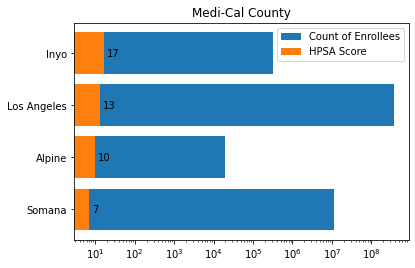

In [29]:
import matplotlib.pyplot as plt
enrollee=[11536744,19885,365255701,322761]
score=[7,10,13,17]

labels=['Somana','Alpine','Los Angeles','Inyo']
y_positions=np.arange(len(labels))  

fig,ax=plt.subplots()
rects1=ax.barh(y_positions,enrollee,label='Count of Enrollees')
rects2=ax.barh(y_positions,score,label='HPSA Score')
ax.set_yticks(y_positions,labels)
ax.set_xscale('log')
ax.legend(loc='upper right')
ax.bar_label(rects2,padding=3)
plt.title('Medi-Cal County')
plt.show()